**Image Cartoonization**

The technique known as "image cartoonization" turns an ordinary shot into a stylised, cartoon-like depiction. The picture appears whimsical and illustrative due to the bold contours, subdued colours, and lack of detail that characterise this artistic impression. Cartoonization is frequently employed in digital art, animations, and other visual communication mediums for artistic and creative goals.

**The Internal Workings of Image Cartoonization:**


To get the desired styled effect, image cartoonization usually combines a number of filtering and processing processes. This is a high-level summary of the internal workings of cartoonization:

**Converting to Grayscale:**

The input colour image is typically converted to a grayscale representation at the start of the process. This reduction of the image to grayscale aids in concentrating on the image's brightness or intensity data.

**Bilateral Filtering for Smoothing:**

A bilateral filter is used to give the cartoonized image a smooth appearance while keeping key edges intact. The bilateral filter is useful for smoothing while maintaining edge features since it takes into account both spatial and intensity differences. By taking this procedure, noise and undesired high-frequency data are reduced.

**Edge Recognition:**

The smoothed image is subjected to an edge-detection algorithm in order to discover and highlight noticeable edges. Adaptive thresholding is a common approach that highlights areas of significant intensity variation by creating a binary mask.

**Blending the Edges with the Smoothed Image:**

Bitwise AND is used to combine the edge mask and the smoothed picture. Where edges are identified, this phase preserves the colours and details from the original image while obliterating other information.The end effect is a cartoon-like image with a more subdued colour scheme and sharpened edges.

**Modifications and Enhancements:**

It is possible to make more tweaks to enhance the cartoonized appearance. Depending on the desired look, this may entail changing the contrast, colour saturation, or application of additional artistic filters.

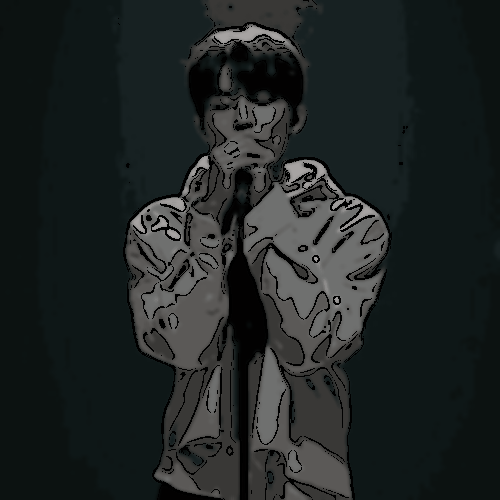

In [52]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

**OpenCV**  is an open-source computer vision and machine learning software library. It is designed to provide a common infrastructure for computer vision applications and to accelerate the development of real-time vision-related projects. OpenCV supports various programming languages, including C++, Python, and Java.

**NumPy** is a fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays. NumPy is a core library for scientific and numerical computing in Python and is often used in conjunction with libraries like OpenCV for efficient array operations.

In computer vision projects, OpenCV and NumPy are often used together to process and manipulate image data efficiently. The combination of OpenCV's computer vision capabilities and NumPy's array operations provides a powerful toolkit for a wide range of applications.

In [53]:
def read_file(filename):
  img = cv2.imread(filename)
  cv2_imshow(img)
  return img

In [54]:
def color_quantization(img, k):
# Transform the image
  data = np.float32(img).reshape((-1, 3))

# Determine criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

# Implementing K-Means
  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

In [55]:
def edge_mask(img, line_size, blur_value):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  return edges

**Upload Image File**

Saving ironman.jpg to ironman.jpg


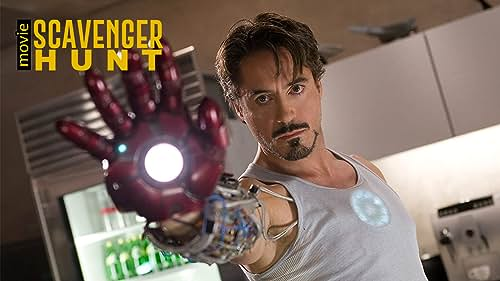

In [56]:
uploaded = files.upload()
filename = next(iter(uploaded))
img = read_file(filename)

**Run Code to Create Cartoon Effect**

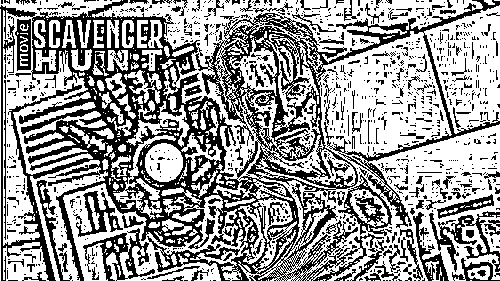

In [57]:
line_size = 7
blur_value = 1
edges = edge_mask(img, line_size, blur_value)
cv2_imshow(edges)

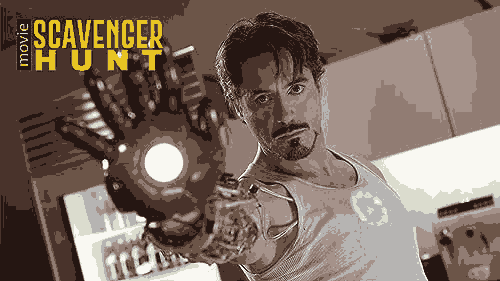

In [58]:
total_color = 9
img = color_quantization(img, total_color)
cv2_imshow(img)

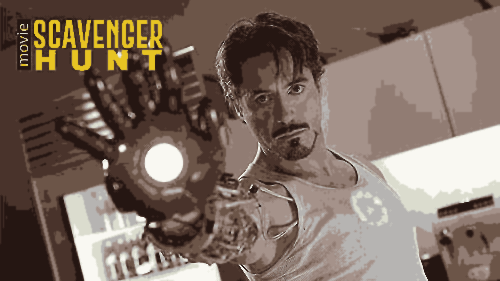

In [59]:
blurred = cv2.bilateralFilter(img, d=1, sigmaColor=200,sigmaSpace=200)
cv2_imshow(blurred)

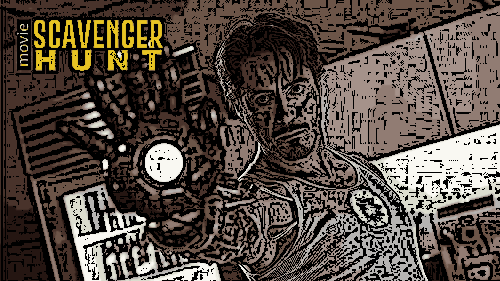

In [60]:
cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)
cv2_imshow(cartoon)